## Working Area

### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

### Data Loading

In [2]:
df = pd.read_csv('/content/clean_nus_sms.csv')

# See the data
df.head()

,Unnamed: 0,id,Message,length,country,Date
0,0,10120,Bugis oso near wat...,21,SG,2003/4
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4
2,2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4
3,3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4
4,4,10124,Meet after lunch la...,22,SG,2003/4


### Preprocessing

In [3]:
# Check for missing values in the data
df.isna().sum()

Unnamed: 0    0
id            0
Message       3
length        0
country       0
Date          0
dtype: int64

In [4]:
# Handling missing values
df = df.dropna()

Handling missing values by discarding them because the missing values are small in number.

In [5]:
# Check for data type in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48595 entries, 0 to 48597
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48595 non-null  int64 
 1   id          48595 non-null  int64 
 2   Message     48595 non-null  object
 3   length      48595 non-null  object
 4   country     48595 non-null  object
 5   Date        48595 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.6+ MB


In [6]:
# Convert the values in the "Date" column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

Changing the data type of the Date column because it is not appropriate.

In [7]:
# Convert all the text to lowercase
df['Message'] = df['Message'].str.lower()

Normalize all messages by lowering the case.

In [8]:
# Remove non-alphabetical characters
df['Message'] = df['Message'].str.replace('[^a-zA-Z\s]', '', regex=True)

# Remove digits
df['Message'] = df['Message'].str.replace('[\d]', '', regex=True)

# Remove specific symbols like & and *
df['Message'] = df['Message'].str.replace('[&*]', '', regex=True)

Perform noise removal using the method above.

### Exploratory Data Analysis (EDA)

In [9]:
# Conduct sentiment analysis on the text messages
def analyze_sentiment(message):
    analysis = TextBlob(str(message))
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['Message'].apply(analyze_sentiment)
df['Sentiment'].value_counts()

Neutral     24332
Positive    18601
Negative     5662
Name: Sentiment, dtype: int64

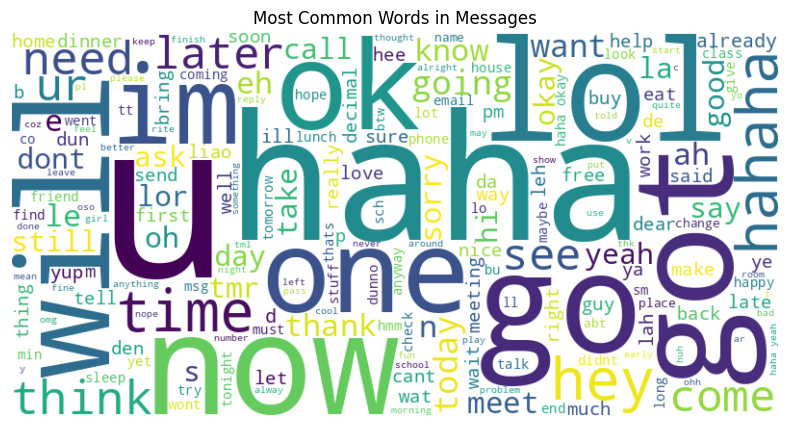

Most Common Words in Messages:
i: 17410
to: 10641
u: 9870
you: 8780
the: 7995


In [10]:
# Find the most common words users text about
all_messages = " ".join(df['Message'])
words = all_messages.split()

word_freq = Counter(words)
common_words = word_freq.most_common(5)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Messages")
plt.show()

print("Most Common Words in Messages:")
for word, freq in common_words:
    print(f"{word}: {freq}")

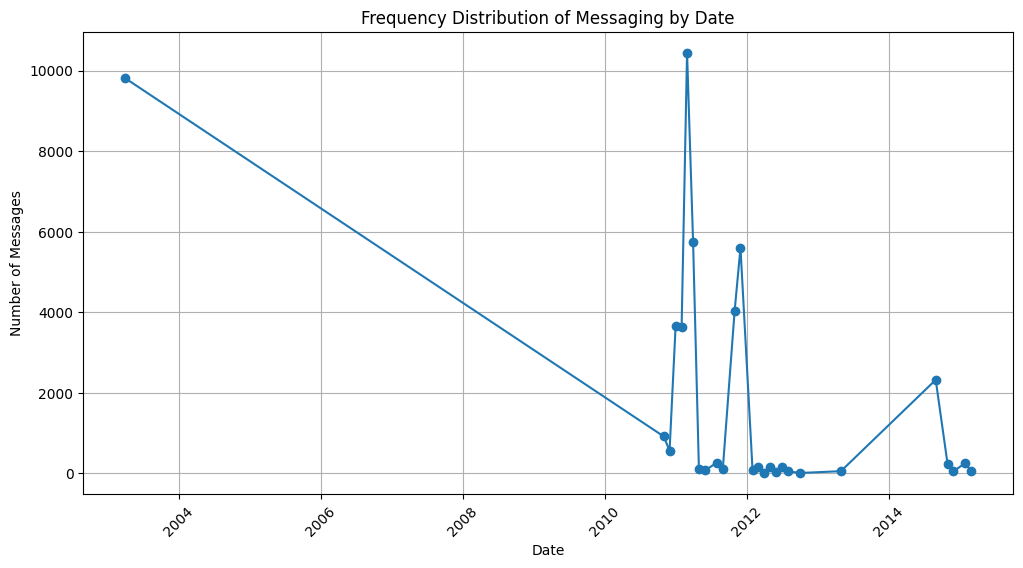

In [11]:
# Create frequency distributions for messaging
message_counts = df['Date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(message_counts.index, message_counts.values, marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Number of Messages")
plt.title("Frequency Distribution of Messaging by Date")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Model Training

In [12]:
# Use a Naive Bayes classifier to predict the sentiment of message
X = df['Message']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

### Model Evaluation

In [13]:
y_pred = nb_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8031415049043145


### Model Saving

In [14]:
with open('tfidf_vectorizer.pkl', 'wb') as file_1:
  joblib.dump(tfidf_vectorizer, file_1)

with open('nb_classifier.pkl', 'wb') as file_2:
  joblib.dump(nb_classifier, file_2)